# Women's Rankings

Get ratings of each team in a given year. This file needs to be ran for every relevant year (2012 to 2024). 

### Web Scraping

Fair warning that this program unfortunately takes a very long time to run due to web scraping limits set by Sports Reference

In [1]:
import pandas as pd
import numpy as np
import time

season = 2017

df_active_teams = pd.read_html('https://www.sports-reference.com/cbb/schools/index.html')[0]
time.sleep(2)

df_active_teams = df_active_teams.loc[~df_active_teams['School'].isin([np.NaN, 'School']), :].reset_index(drop=True)

df_active_teams['From'] = pd.to_numeric(df_active_teams['From'], errors='coerce')
df_active_teams['To'] = pd.to_numeric(df_active_teams['To'], errors='coerce')

df_active_teams = df_active_teams.loc[(df_active_teams['To'] >= season) & (df_active_teams['From'] <= season), :].reset_index(drop=True)

if season == 2021:  # if 2021, remove ivy league because they cancelled their season in 2021
    df_active_teams = df_active_teams.loc[
        ~df_active_teams['School'].isin(['Princeton', 'Harvard', 'Yale', 'Pennsylvania', 'Brown', 'Columbia', 'Cornell', 'Dartmouth']), 
        :
    ].reset_index(drop=True)

df_active_teams

,Rk,School,"City, State",From,To,Yrs,G,W,L,W-L%,SRS,SOS,AP,CREG,CTRN,NCAA,FF,NC
0,1,Abilene Christian,"Abilene, Texas",1971,2024,14,420,225,195,.536,-7.71,-5.57,0,0,2,2,0,0
1,2,Air Force,"USAF Academy, Colorado",1958,2024,67,1842,794,1048,.431,-2.78,1.34,0,1,0,4,0,0
2,3,Akron,"Akron, Ohio",1902,2024,73,1714,1024,690,.597,0.01,-1.56,0,9,5,5,0,0
3,4,Alabama,"Tuscaloosa, Alabama",1913,2024,111,2890,1790,1099,.620,7.96,4.92,17,12,9,24,0,0
4,5,Alabama A&M,"Normal, Alabama",2000,2024,25,719,275,444,.382,-16.63,-11.06,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,487,Wright State,"Dayton, Ohio",1988,2024,37,1128,631,497,.559,-1.32,-2.55,0,4,4,4,0,0
347,488,Wyoming,"Laramie, Wyoming",1905,2024,119,2875,1609,1266,.560,2.74,2.75,4,21,3,16,1,1
348,489,Xavier,"Cincinnati, Ohio",1920,2024,103,2694,1610,1084,.598,6.08,3.99,13,18,9,29,0,0
349,490,Yale,"New Haven, Connecticut",1896,2024,128,3082,1563,1516,.508,-5.99,-4.45,1,16,2,6,0,0


In [2]:
from datetime import datetime

cutoff_dates = {
    2012: datetime(2012, 3, 16),
    2013: datetime(2013, 3, 22),
    2014: datetime(2014, 3, 21),
    2015: datetime(2015, 3, 19),
    2016: datetime(2016, 3, 17),
    2017: datetime(2017, 3, 16),
    2018: datetime(2018, 3, 15),
    2019: datetime(2019, 3, 21),
    2020: datetime(2020, 3, 13),  # cancelled
    2021: datetime(2021, 3, 24),
    2022: datetime(2022, 3, 17),
    2023: datetime(2023, 3, 16),
}

cutoff_dates[season]

datetime.datetime(2017, 3, 16, 0, 0)

Get school names used in Sports Reference URL

In [3]:
df_active_teams['URL School'] = df_active_teams['School']

# hard code some schools that cause issues
df_active_teams.loc[df_active_teams['School'] == 'Bowling Green', 'URL School'] = 'Bowling Green State'
df_active_teams.loc[df_active_teams['School'] == 'BYU', 'URL School'] = 'Brigham Young'
df_active_teams.loc[df_active_teams['School'] == 'Louisiana', 'URL School'] = 'Louisiana Lafayette'
df_active_teams.loc[df_active_teams['School'] == 'LSU', 'URL School'] = 'Louisiana State'
df_active_teams.loc[df_active_teams['School'] == 'Ole Miss', 'URL School'] = 'Mississippi'
df_active_teams.loc[df_active_teams['School'] == 'Pitt', 'URL School'] = 'Pittsburgh'
df_active_teams.loc[df_active_teams['School'] == 'SMU', 'URL School'] = 'Southern Methodist'
df_active_teams.loc[df_active_teams['School'] == 'UAB', 'URL School'] = 'Alabama Birmingham'
df_active_teams.loc[df_active_teams['School'] == 'UCF', 'URL School'] = 'Central Florida'
df_active_teams.loc[df_active_teams['School'] == 'USC', 'URL School'] = 'Southern California'
df_active_teams.loc[df_active_teams['School'] == 'UTEP', 'URL School'] = 'Texas El Paso'
df_active_teams.loc[df_active_teams['School'] == 'UTSA', 'URL School'] = 'Texas San Antonio'
df_active_teams.loc[df_active_teams['School'] == 'Sam Houston', 'URL School'] = 'Sam Houston State'
df_active_teams.loc[df_active_teams['School'] == 'Houston Christian', 'URL School'] = 'Houston Baptist'
df_active_teams.loc[df_active_teams['School'] == 'Kansas City', 'URL School'] = 'Missouri Kansas City'
df_active_teams.loc[df_active_teams['School'] == 'Little Rock', 'URL School'] = 'Arkansas Little Rock'
df_active_teams.loc[df_active_teams['School'] == 'NC State', 'URL School'] = 'North Carolina State'
df_active_teams.loc[df_active_teams['School'] == 'Omaha', 'URL School'] = 'Nebraska Omaha'
df_active_teams.loc[df_active_teams['School'] == 'Purdue Fort Wayne', 'URL School'] = 'IPFW'
df_active_teams.loc[df_active_teams['School'] == 'TCU', 'URL School'] = 'Texas Christian'
df_active_teams.loc[df_active_teams['School'] == 'Texas-Rio Grande Valley', 'URL School'] = 'Texas Pan American'
df_active_teams.loc[df_active_teams['School'] == 'The Citadel', 'URL School'] = 'Citadel'
df_active_teams.loc[df_active_teams['School'] == 'Utah Tech', 'URL School'] = 'Dixie State'
df_active_teams.loc[df_active_teams['School'] == 'St. Thomas', 'URL School'] = 'St. Thomas MN'
df_active_teams.loc[df_active_teams['School'] == 'UC Berkley', 'URL School'] = 'California'
df_active_teams.loc[df_active_teams['School'] == 'UT Arlington', 'URL School'] = 'Texas Arlington'
df_active_teams.loc[df_active_teams['School'] == 'FDU', 'URL School'] = 'Fairleigh Dickinson'
df_active_teams.loc[df_active_teams['School'] == 'Hartford Hawks', 'URL School'] = 'Hartford'
df_active_teams.loc[df_active_teams['School'] == 'Savannah State Tigers', 'URL School'] = 'Savannah State'
df_active_teams.loc[df_active_teams['School'] == 'St. Francis (NY) Terriers', 'URL School'] = 'St. Francis (NY)'

df_active_teams['URL School'] = df_active_teams['URL School'].str.replace(r'^UC\s', 'California ', regex=True)
df_active_teams['URL School'] = df_active_teams['URL School'].str.replace(r'^UNC\s', 'North Carolina ', regex=True)

In [4]:
urls = (
    'https://www.sports-reference.com/cbb/schools/' +
    df_active_teams['URL School'].str.replace(' ', '-', regex=False).str.replace('[)(&.\']', '', regex=True).str.replace('--', '-', regex=False).str.lower() +
    '/women/' + str(season) +
    '-gamelogs.html'
)

urls

0      https://www.sports-reference.com/cbb/schools/a...
1      https://www.sports-reference.com/cbb/schools/a...
2      https://www.sports-reference.com/cbb/schools/a...
3      https://www.sports-reference.com/cbb/schools/a...
4      https://www.sports-reference.com/cbb/schools/a...
                             ...                        
346    https://www.sports-reference.com/cbb/schools/w...
347    https://www.sports-reference.com/cbb/schools/w...
348    https://www.sports-reference.com/cbb/schools/x...
349    https://www.sports-reference.com/cbb/schools/y...
350    https://www.sports-reference.com/cbb/schools/y...
Name: URL School, Length: 351, dtype: object

In [5]:
from urllib.error import HTTPError
from tqdm.notebook import tqdm

problems = []

l = []
loop = tqdm(
    np.array((df_active_teams['School'], urls)).transpose(),  # get both school and url into loop iteration
    bar_format='{bar}{percentage:3.0f}%{r_bar}   {desc}'  # make the description not affect bar location
)
for (school, url) in loop:
  try:
    loop.set_description(f'{school}')
    # print(f'{i:03d}: {url}')
    df_team_season = pd.read_html(url)[-1]  # schools that were ranked have that info as the first table on the site
    time.sleep(2)

    df_team_season.columns = [i[1] if 'Unnamed' in i[0] else i[0] + ' ' + i[1] for i in df_team_season.columns]
    df_team_season.insert(2, 'Team', school)
    l.append(df_team_season)
  except ValueError as e:
    print(f'{url} | ValueError: {e}')
    time.sleep(2)
  except HTTPError as e:
    if e.code == 404:
      print(f'{url} | {e}')
      time.sleep(2)
    else:
      print(f'{url} | {e}')
      break

df = pd.concat(l, ignore_index=True)

df

            0%| 0/351 [00:00<?, ?it/s]   

https://www.sports-reference.com/cbb/schools/citadel/women/2017-gamelogs.html | HTTP Error 404: Not Found
https://www.sports-reference.com/cbb/schools/virginia-military-institute/women/2017-gamelogs.html | HTTP Error 404: Not Found


,G,Date,Team,Unnamed: 2_level_1,Opp,W/L,Tm,Opp,School FG,School FGA,...,Opponent FT,Opponent FTA,Opponent FT%,Opponent ORB,Opponent TRB,Opponent AST,Opponent STL,Opponent BLK,Opponent TOV,Opponent PF
0,1,2016-11-11,Abilene Christian,@,Missouri,L,46,52,15,52,...,15,21,.714,9,33,7,17,7,19,21
1,2,2016-11-15,Abilene Christian,NaN,Howard Payne,W,87,52,35,74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2016-11-18,Abilene Christian,NaN,Omaha,W,73,66,25,50,...,7,19,.368,13,34,16,8,0,15,17
3,4,2016-11-19,Abilene Christian,NaN,Texas-Rio Grande Valley,W,70,54,19,55,...,8,12,.667,13,29,10,9,6,15,28
4,5,2016-11-26,Abilene Christian,@,Texas A&M,L,45,71,18,43,...,15,24,.625,15,35,16,18,4,14,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11669,26,2017-02-16,Youngstown State,NaN,Northern Kentucky,W (1 OT),77,73,26,58,...,16,18,.889,10,37,11,11,1,18,17
11670,27,2017-02-18,Youngstown State,NaN,Wright State,L,64,68,25,48,...,8,16,.500,11,28,13,15,4,7,16
11671,28,2017-02-23,Youngstown State,NaN,Oakland,L,58,80,20,65,...,16,22,.727,12,45,13,6,0,18,20
11672,29,2017-02-25,Youngstown State,NaN,Detroit Mercy,L,67,83,26,71,...,10,18,.556,7,43,15,4,7,8,10


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11674 entries, 0 to 11673
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   G                    11325 non-null  object 
 1   Date                 11325 non-null  object 
 2   Team                 11674 non-null  object 
 3   Unnamed: 2_level_1   5395 non-null   object 
 4   Opp                  11288 non-null  object 
 5   W/L                  11325 non-null  object 
 6   Tm                   11325 non-null  object 
 7   Opp                  11325 non-null  object 
 8   School FG            11658 non-null  object 
 9   School FGA           11658 non-null  object 
 10  School FG%           11658 non-null  object 
 11  School 3P            11658 non-null  object 
 12  School 3PA           11658 non-null  object 
 13  School 3P%           11658 non-null  object 
 14  School FT            11658 non-null  object 
 15  School FTA           11658 non-null 

### Data Setup

In [7]:
temp = df.copy()

In [8]:
df = temp.copy()

Fix column names and drop useless columns

In [9]:
df.columns = (
    ['G', 'Date', 'Team', 'Location', 'Opponent', 'Result', 'Team Score', 'Opponent Score'] +
    [c for c in df.columns[8:]]
)

# use "Team" as prefix instead of "School"
df.columns = df.columns.str.replace('School', 'Team', regex=False)

# drop columns that are completely null
df = df[[c for c in df.columns if df.loc[:, c].notna().any()]].copy()

# drop other irrelevant columns
df.drop(columns=['G'], inplace=True)

df

,Date,Team,Location,Opponent,Result,Team Score,Opponent Score,Team FG,Team FGA,Team FG%,...,Opponent FT,Opponent FTA,Opponent FT%,Opponent ORB,Opponent TRB,Opponent AST,Opponent STL,Opponent BLK,Opponent TOV,Opponent PF
0,2016-11-11,Abilene Christian,@,Missouri,L,46,52,15,52,.288,...,15,21,.714,9,33,7,17,7,19,21
1,2016-11-15,Abilene Christian,NaN,Howard Payne,W,87,52,35,74,.473,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-11-18,Abilene Christian,NaN,Omaha,W,73,66,25,50,.500,...,7,19,.368,13,34,16,8,0,15,17
3,2016-11-19,Abilene Christian,NaN,Texas-Rio Grande Valley,W,70,54,19,55,.345,...,8,12,.667,13,29,10,9,6,15,28
4,2016-11-26,Abilene Christian,@,Texas A&M,L,45,71,18,43,.419,...,15,24,.625,15,35,16,18,4,14,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11669,2017-02-16,Youngstown State,NaN,Northern Kentucky,W (1 OT),77,73,26,58,.448,...,16,18,.889,10,37,11,11,1,18,17
11670,2017-02-18,Youngstown State,NaN,Wright State,L,64,68,25,48,.521,...,8,16,.500,11,28,13,15,4,7,16
11671,2017-02-23,Youngstown State,NaN,Oakland,L,58,80,20,65,.308,...,16,22,.727,12,45,13,6,0,18,20
11672,2017-02-25,Youngstown State,NaN,Detroit Mercy,L,67,83,26,71,.366,...,10,18,.556,7,43,15,4,7,8,10


Reformat result column because it contains information about overtime

In [10]:
# remove games that have not been played
df = df.loc[(df['Result'].notna()) & (df['Result'] != 'W/L'), :].reset_index(drop=True)

# get overtime info
df['Overtimes Amount'] = df['Result'].str.extract(r'(\d+)').astype('float16')
df.loc[df['Overtimes Amount'].isna(), 'Overtimes Amount'] = 0
df['Overtimes Amount'] = df['Overtimes Amount'].astype(int)

# binary overtime flag
df['Overtime'] = df['Overtimes Amount'].copy()
df.loc[df['Overtime'] > 1, 'Overtime'] = 1
df['Overtime'] = df['Overtime'].astype('int8')

# reformat result column
df['Result'] = df['Result'].str[:1].map({'W': 1, 'L': -1}).astype('int8')

df

,Date,Team,Location,Opponent,Result,Team Score,Opponent Score,Team FG,Team FGA,Team FG%,...,Opponent FT%,Opponent ORB,Opponent TRB,Opponent AST,Opponent STL,Opponent BLK,Opponent TOV,Opponent PF,Overtimes Amount,Overtime
0,2016-11-11,Abilene Christian,@,Missouri,-1,46,52,15,52,.288,...,.714,9,33,7,17,7,19,21,0,0
1,2016-11-15,Abilene Christian,NaN,Howard Payne,1,87,52,35,74,.473,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,2016-11-18,Abilene Christian,NaN,Omaha,1,73,66,25,50,.500,...,.368,13,34,16,8,0,15,17,0,0
3,2016-11-19,Abilene Christian,NaN,Texas-Rio Grande Valley,1,70,54,19,55,.345,...,.667,13,29,10,9,6,15,28,0,0
4,2016-11-26,Abilene Christian,@,Texas A&M,-1,45,71,18,43,.419,...,.625,15,35,16,18,4,14,12,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10971,2017-02-16,Youngstown State,NaN,Northern Kentucky,1,77,73,26,58,.448,...,.889,10,37,11,11,1,18,17,1,1
10972,2017-02-18,Youngstown State,NaN,Wright State,-1,64,68,25,48,.521,...,.500,11,28,13,15,4,7,16,0,0
10973,2017-02-23,Youngstown State,NaN,Oakland,-1,58,80,20,65,.308,...,.727,12,45,13,6,0,18,20,0,0
10974,2017-02-25,Youngstown State,NaN,Detroit Mercy,-1,67,83,26,71,.366,...,.556,7,43,15,4,7,8,10,0,0


Reformat location column for home/neutral/away

In [11]:
df['Location'] = df['Location'].map({np.NaN: 1, 'N': 0, '@': -1}).astype('int8')

df['Location']

0       -1
1        1
2        1
3        1
4       -1
        ..
10971    1
10972    1
10973    1
10974    1
10975    1
Name: Location, Length: 10976, dtype: int8

Other general fixes

In [12]:
# fix dates
df['Date'] = pd.to_datetime(df['Date'])

# specify before and after NCAA tournament
df.insert(df.columns.get_loc('Date') + 1, 'NCAA Tournament', (df['Date'] > cutoff_dates[season]).astype(int))

# fix column types
df.loc[:, df.columns.str.contains('Team ', regex=False)] = df.loc[:, df.columns.str.contains('Team ', regex=False)].astype('float64')
df.loc[:, df.columns.str.contains('Opponent ', regex=False)] = df.loc[:, df.columns.str.contains('Opponent ', regex=False)].astype('float64')

df

,Date,NCAA Tournament,Team,Location,Opponent,Result,Team Score,Opponent Score,Team FG,Team FGA,...,Opponent FT%,Opponent ORB,Opponent TRB,Opponent AST,Opponent STL,Opponent BLK,Opponent TOV,Opponent PF,Overtimes Amount,Overtime
0,2016-11-11,0,Abilene Christian,-1,Missouri,-1,46.0,52.0,15.0,52.0,...,0.714,9.0,33.0,7.0,17.0,7.0,19.0,21.0,0,0
1,2016-11-15,0,Abilene Christian,1,Howard Payne,1,87.0,52.0,35.0,74.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,2016-11-18,0,Abilene Christian,1,Omaha,1,73.0,66.0,25.0,50.0,...,0.368,13.0,34.0,16.0,8.0,0.0,15.0,17.0,0,0
3,2016-11-19,0,Abilene Christian,1,Texas-Rio Grande Valley,1,70.0,54.0,19.0,55.0,...,0.667,13.0,29.0,10.0,9.0,6.0,15.0,28.0,0,0
4,2016-11-26,0,Abilene Christian,-1,Texas A&M,-1,45.0,71.0,18.0,43.0,...,0.625,15.0,35.0,16.0,18.0,4.0,14.0,12.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10971,2017-02-16,0,Youngstown State,1,Northern Kentucky,1,77.0,73.0,26.0,58.0,...,0.889,10.0,37.0,11.0,11.0,1.0,18.0,17.0,1,1
10972,2017-02-18,0,Youngstown State,1,Wright State,-1,64.0,68.0,25.0,48.0,...,0.500,11.0,28.0,13.0,15.0,4.0,7.0,16.0,0,0
10973,2017-02-23,0,Youngstown State,1,Oakland,-1,58.0,80.0,20.0,65.0,...,0.727,12.0,45.0,13.0,6.0,0.0,18.0,20.0,0,0
10974,2017-02-25,0,Youngstown State,1,Detroit Mercy,-1,67.0,83.0,26.0,71.0,...,0.556,7.0,43.0,15.0,4.0,7.0,8.0,10.0,0,0


Remap opponent names because the opponents sometimes have a different naming convention than the team names

In [13]:
# create new dataframe from opposite perspective    team <--> opponent
df_switch = df.copy()

df_switch.columns = df_switch.columns.str.replace(
    'Team', '_TEMP_', regex=False
).str.replace(
    'Opponent', 'Team', regex=False
).str.replace(
    '_TEMP_', 'Opponent', regex=False
)

df_switch[['Location', 'Result']] *= -1

# get fixed opponent names
df['Opponent'] = pd.merge(
    df, df_switch,
    how='left',
    on=(
        ['Date', 'Location', 'Result'] +
        list(df.loc[:, df.columns.str.contains('Team ')].columns) +
        list(df.loc[:, df.columns.str.contains('Opponent ')].columns)
    )
)['Opponent_y']

# Remove matchups that are not division 1
df = df.loc[df['Opponent'].notna(), :].reset_index(drop=True)

df

,Date,NCAA Tournament,Team,Location,Opponent,Result,Team Score,Opponent Score,Team FG,Team FGA,...,Opponent FT%,Opponent ORB,Opponent TRB,Opponent AST,Opponent STL,Opponent BLK,Opponent TOV,Opponent PF,Overtimes Amount,Overtime
0,2016-11-11,0,Abilene Christian,-1,Missouri,-1,46.0,52.0,15.0,52.0,...,0.714,9.0,33.0,7.0,17.0,7.0,19.0,21.0,0,0
1,2016-11-18,0,Abilene Christian,1,Omaha,1,73.0,66.0,25.0,50.0,...,0.368,13.0,34.0,16.0,8.0,0.0,15.0,17.0,0,0
2,2016-11-19,0,Abilene Christian,1,Texas-Rio Grande Valley,1,70.0,54.0,19.0,55.0,...,0.667,13.0,29.0,10.0,9.0,6.0,15.0,28.0,0,0
3,2016-11-26,0,Abilene Christian,-1,Texas A&M,-1,45.0,71.0,18.0,43.0,...,0.625,15.0,35.0,16.0,18.0,4.0,14.0,12.0,0,0
4,2016-11-29,0,Abilene Christian,-1,UTSA,-1,68.0,71.0,25.0,59.0,...,0.700,9.0,30.0,13.0,16.0,6.0,13.0,16.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10701,2017-02-16,0,Youngstown State,1,Northern Kentucky,1,77.0,73.0,26.0,58.0,...,0.889,10.0,37.0,11.0,11.0,1.0,18.0,17.0,1,1
10702,2017-02-18,0,Youngstown State,1,Wright State,-1,64.0,68.0,25.0,48.0,...,0.500,11.0,28.0,13.0,15.0,4.0,7.0,16.0,0,0
10703,2017-02-23,0,Youngstown State,1,Oakland,-1,58.0,80.0,20.0,65.0,...,0.727,12.0,45.0,13.0,6.0,0.0,18.0,20.0,0,0
10704,2017-02-25,0,Youngstown State,1,Detroit Mercy,-1,67.0,83.0,26.0,71.0,...,0.556,7.0,43.0,15.0,4.0,7.0,8.0,10.0,0,0


Set up adjusted Score Differential

In [14]:
blowout_threshold = 18  # adjusted score differential will only account up to this score difference

df['Score Differential'] = df['Team Score'] - df['Opponent Score']

df['Adjusted Score Differential'] = df['Score Differential'].abs()

df.loc[df['Adjusted Score Differential'] > blowout_threshold, 'Adjusted Score Differential'] = blowout_threshold

df['Adjusted Score Differential'] = df['Adjusted Score Differential']**(np.log(1.5)/np.log(blowout_threshold))

df

,Date,NCAA Tournament,Team,Location,Opponent,Result,Team Score,Opponent Score,Team FG,Team FGA,...,Opponent TRB,Opponent AST,Opponent STL,Opponent BLK,Opponent TOV,Opponent PF,Overtimes Amount,Overtime,Score Differential,Adjusted Score Differential
0,2016-11-11,0,Abilene Christian,-1,Missouri,-1,46.0,52.0,15.0,52.0,...,33.0,7.0,17.0,7.0,19.0,21.0,0,0,-6.0,1.285760
1,2016-11-18,0,Abilene Christian,1,Omaha,1,73.0,66.0,25.0,50.0,...,34.0,16.0,8.0,0.0,15.0,17.0,0,0,7.0,1.313867
2,2016-11-19,0,Abilene Christian,1,Texas-Rio Grande Valley,1,70.0,54.0,19.0,55.0,...,29.0,10.0,9.0,6.0,15.0,28.0,0,0,16.0,1.475419
3,2016-11-26,0,Abilene Christian,-1,Texas A&M,-1,45.0,71.0,18.0,43.0,...,35.0,16.0,18.0,4.0,14.0,12.0,0,0,-26.0,1.500000
4,2016-11-29,0,Abilene Christian,-1,UTSA,-1,68.0,71.0,25.0,59.0,...,30.0,13.0,16.0,6.0,13.0,16.0,0,0,-3.0,1.166625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10701,2017-02-16,0,Youngstown State,1,Northern Kentucky,1,77.0,73.0,26.0,58.0,...,37.0,11.0,11.0,1.0,18.0,17.0,1,1,4.0,1.214668
10702,2017-02-18,0,Youngstown State,1,Wright State,-1,64.0,68.0,25.0,48.0,...,28.0,13.0,15.0,4.0,7.0,16.0,0,0,-4.0,1.214668
10703,2017-02-23,0,Youngstown State,1,Oakland,-1,58.0,80.0,20.0,65.0,...,45.0,13.0,6.0,0.0,18.0,20.0,0,0,-22.0,1.500000
10704,2017-02-25,0,Youngstown State,1,Detroit Mercy,-1,67.0,83.0,26.0,71.0,...,43.0,15.0,4.0,7.0,8.0,10.0,0,0,-16.0,1.475419


Get per possession stats

In [15]:
Y = 0.44

df['Possessions'] = (
    df['Team FGA'] - df['Team ORB'] + df['Team TOV'] + Y*df['Team FTA'] +
    df['Opponent FGA'] - df['Opponent ORB'] + df['Opponent TOV'] + Y*df['Opponent FTA']
)/2

df['Team PPP'] = df['Team Score'] / df['Possessions']
df['Opponent PPP'] = df['Opponent Score'] / df['Possessions']
df['Tempo'] = 40*df['Possessions'] / (40 + 5*df['Overtimes Amount'])

# some games are missing stats due to delay/finished recently
df = df.loc[df['Team PPP'].notna(), :].reset_index(drop=True)

df

,Date,NCAA Tournament,Team,Location,Opponent,Result,Team Score,Opponent Score,Team FG,Team FGA,...,Opponent TOV,Opponent PF,Overtimes Amount,Overtime,Score Differential,Adjusted Score Differential,Possessions,Team PPP,Opponent PPP,Tempo
0,2016-11-11,0,Abilene Christian,-1,Missouri,-1,46.0,52.0,15.0,52.0,...,19.0,21.0,0,0,-6.0,1.285760,68.70,0.669578,0.756914,68.700000
1,2016-11-18,0,Abilene Christian,1,Omaha,1,73.0,66.0,25.0,50.0,...,15.0,17.0,0,0,7.0,1.313867,67.24,1.085663,0.981559,67.240000
2,2016-11-19,0,Abilene Christian,1,Texas-Rio Grande Valley,1,70.0,54.0,19.0,55.0,...,15.0,28.0,0,0,16.0,1.475419,68.90,1.015965,0.783745,68.900000
3,2016-11-26,0,Abilene Christian,-1,Texas A&M,-1,45.0,71.0,18.0,43.0,...,14.0,12.0,0,0,-26.0,1.500000,69.04,0.651796,1.028389,69.040000
4,2016-11-29,0,Abilene Christian,-1,UTSA,-1,68.0,71.0,25.0,59.0,...,13.0,16.0,0,0,-3.0,1.166625,78.82,0.862725,0.900787,78.820000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10669,2017-02-16,0,Youngstown State,1,Northern Kentucky,1,77.0,73.0,26.0,58.0,...,18.0,17.0,1,1,4.0,1.214668,79.42,0.969529,0.919164,70.595556
10670,2017-02-18,0,Youngstown State,1,Wright State,-1,64.0,68.0,25.0,48.0,...,7.0,16.0,0,0,-4.0,1.214668,69.66,0.918748,0.976170,69.660000
10671,2017-02-23,0,Youngstown State,1,Oakland,-1,58.0,80.0,20.0,65.0,...,18.0,20.0,0,0,-22.0,1.500000,78.08,0.742828,1.024590,78.080000
10672,2017-02-25,0,Youngstown State,1,Detroit Mercy,-1,67.0,83.0,26.0,71.0,...,8.0,10.0,0,0,-16.0,1.475419,74.00,0.905405,1.121622,74.000000


Save full year for different feature engineering

In [16]:
df.to_csv(f'../data/unprocessed/womens_sports_reference/womens_full_year_sports_reference_{season}.csv', index=False)

'Done'

'Done'

For this part, we only need games from before the NCAA tourney

In [17]:
df = df.loc[df['NCAA Tournament'] == 0, :].reset_index(drop=True)

df

,Date,NCAA Tournament,Team,Location,Opponent,Result,Team Score,Opponent Score,Team FG,Team FGA,...,Opponent TOV,Opponent PF,Overtimes Amount,Overtime,Score Differential,Adjusted Score Differential,Possessions,Team PPP,Opponent PPP,Tempo
0,2016-11-11,0,Abilene Christian,-1,Missouri,-1,46.0,52.0,15.0,52.0,...,19.0,21.0,0,0,-6.0,1.285760,68.70,0.669578,0.756914,68.700000
1,2016-11-18,0,Abilene Christian,1,Omaha,1,73.0,66.0,25.0,50.0,...,15.0,17.0,0,0,7.0,1.313867,67.24,1.085663,0.981559,67.240000
2,2016-11-19,0,Abilene Christian,1,Texas-Rio Grande Valley,1,70.0,54.0,19.0,55.0,...,15.0,28.0,0,0,16.0,1.475419,68.90,1.015965,0.783745,68.900000
3,2016-11-26,0,Abilene Christian,-1,Texas A&M,-1,45.0,71.0,18.0,43.0,...,14.0,12.0,0,0,-26.0,1.500000,69.04,0.651796,1.028389,69.040000
4,2016-11-29,0,Abilene Christian,-1,UTSA,-1,68.0,71.0,25.0,59.0,...,13.0,16.0,0,0,-3.0,1.166625,78.82,0.862725,0.900787,78.820000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10443,2017-02-16,0,Youngstown State,1,Northern Kentucky,1,77.0,73.0,26.0,58.0,...,18.0,17.0,1,1,4.0,1.214668,79.42,0.969529,0.919164,70.595556
10444,2017-02-18,0,Youngstown State,1,Wright State,-1,64.0,68.0,25.0,48.0,...,7.0,16.0,0,0,-4.0,1.214668,69.66,0.918748,0.976170,69.660000
10445,2017-02-23,0,Youngstown State,1,Oakland,-1,58.0,80.0,20.0,65.0,...,18.0,20.0,0,0,-22.0,1.500000,78.08,0.742828,1.024590,78.080000
10446,2017-02-25,0,Youngstown State,1,Detroit Mercy,-1,67.0,83.0,26.0,71.0,...,8.0,10.0,0,0,-16.0,1.475419,74.00,0.905405,1.121622,74.000000


### Model Building

##### Team Ratings

In [18]:
X = (
    pd.get_dummies(df['Team']).astype('int8') -
    pd.get_dummies(df['Opponent']).astype('int8')
)

X['Home Field Advantage'] = df['Location'].copy()

X

,Abilene Christian,Air Force,Akron,Alabama,Alabama A&M,Alabama State,Albany (NY),Alcorn State,American,Appalachian State,...,William & Mary,Winthrop,Wisconsin,Wofford,Wright State,Wyoming,Xavier,Yale,Youngstown State,Home Field Advantage
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10443,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
10444,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-1,0,0,0,1,1
10445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
10446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [19]:
from sklearn.model_selection import GroupKFold

def get_gkf_data(X, y, w, groups, cv=3):
    """
    Converts training data to list of folds
    """
    np.random.seed(22)
    gkf = GroupKFold(n_splits=cv)

    data = []
    for train_index, test_index in gkf.split(X, y, groups=groups):
        X_train = X[train_index]
        X_test = X[test_index]

        y_train = y[train_index]
        y_test = y[test_index]

        # sample weights
        w_train = w[train_index]

        data.append((X_train, X_test, y_train, y_test, w_train))

    return data

cv_data = get_gkf_data(X.to_numpy(), df['Result'].to_numpy(), df[['Adjusted Score Differential']].to_numpy(), df['Date'].to_numpy())

len(cv_data)

3

In [20]:
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
import warnings
import optuna

from sklearn.preprocessing import MinMaxScaler
optuna.logging.set_verbosity(optuna.logging.WARNING)

def objective(trial, cv_data=cv_data):
    # model tuning
    C = trial.suggest_float('C', 0.1, 10, log=True)
    mod = LogisticRegression(penalty='l2', C=C, fit_intercept=False)
    minimum = trial.suggest_float('minimum', 0.1, 1.0, step=0.1)
    maximum = trial.suggest_float('maximum', 1.0, 8.0, step=0.5)
    if minimum >= maximum:
        maximum = minimum + 0.0001

    # cross validation
    y_actuals = []
    y_preds = []
    for X_train, X_test, y_train, y_test, w_train in cv_data:
        y_actuals.append(y_test)

        weights = MinMaxScaler(feature_range=(minimum, maximum)).fit_transform(w_train).reshape(-1)

        with warnings.catch_warnings():
            warnings.filterwarnings('ignore')  # prevent convergence warnings
            mod.fit(X_train, y_train, sample_weight=weights)

        y_preds.append(mod.predict_proba(X_test)[:, 1])

    return log_loss(np.hstack(y_actuals), np.hstack(y_preds))

study = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler(seed=22))
study.optimize(objective, n_trials=100, show_progress_bar=True)

study.best_params

  0%|          | 0/100 [00:00<?, ?it/s]

{'C': 0.4016618617891551, 'minimum': 1.0, 'maximum': 5.5}

In [21]:
optuna.importance.get_param_importances(study)

{'C': 0.6356509849004026,
 'minimum': 0.272904133855913,
 'maximum': 0.0914448812436845}

In [22]:
minimum = study.best_params['minimum']
maximum = study.best_params['maximum']

if minimum >= maximum:
        maximum = minimum + 0.0001

weight = MinMaxScaler(
    feature_range=(minimum, maximum)
).fit_transform(df[['Adjusted Score Differential']]).reshape(-1)

mod = LogisticRegression(penalty='l2', C=study.best_params['C'], fit_intercept=False)

mod.fit(X, df['Result'], sample_weight=weight)

df_ratings = pd.DataFrame(
    {
        'Team': X.columns,
        'Rating': mod.coef_[0]
    }
).sort_values(by=['Rating'], ascending=False, ignore_index=True)

df_ratings_display = df_ratings.loc[df_ratings['Team'] != 'Home Field Advantage', :].reset_index(drop=True)
df_ratings_display.index += 1

df_ratings_display['Strength'] = (np.exp(df_ratings_display['Rating'])/(1 + np.exp(df_ratings_display['Rating'])))*100

df_ratings_display.head(25)

,Team,Rating,Strength
1,Connecticut,5.808826,99.700803
2,Notre Dame,4.731973,99.126785
3,South Carolina,4.587922,98.992849
4,Baylor,4.402229,98.789824
5,Maryland,4.275148,98.628084
6,Mississippi State,3.989130,98.182078
7,Stanford,3.941602,98.095276
8,Oregon State,3.921551,98.057448
9,Washington,3.905391,98.026426
10,Duke,3.880566,97.977822


##### Adjusted Offense/Defense Ratings

In [23]:
X_offense = pd.get_dummies(
    df['Team']
).astype('int8')

X_offense.columns += ' Offense'

X_defense = -pd.get_dummies(
    df['Opponent']
).astype('int8')

X_defense.columns += ' Defense'

X = pd.concat([X_offense, X_defense], axis=1)

X['Home Field Advantage'] = df['Location'].copy()

X

,Abilene Christian Offense,Air Force Offense,Akron Offense,Alabama Offense,Alabama A&M Offense,Alabama State Offense,Albany (NY) Offense,Alcorn State Offense,American Offense,Appalachian State Offense,...,William & Mary Defense,Winthrop Defense,Wisconsin Defense,Wofford Defense,Wright State Defense,Wyoming Defense,Xavier Defense,Yale Defense,Youngstown State Defense,Home Field Advantage
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10443,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10444,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-1,0,0,0,0,1
10445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [24]:
def get_gkf_data(X, y, groups, cv=3):
    """
    Converts training data to list of folds
    """
    np.random.seed(22)
    gkf = GroupKFold(n_splits=cv)

    data = []
    for train_index, test_index in gkf.split(X, y, groups=groups):
        X_train = X[train_index, :]
        X_test = X[test_index, :]

        y_train = y[train_index]
        y_test = y[test_index]

        data.append([X_train, X_test, y_train, y_test])

    return data

cv_data = get_gkf_data(X.to_numpy(), df['Team PPP'].to_numpy(), df['Date'].to_numpy())

len(cv_data)

3

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

optuna.logging.set_verbosity(optuna.logging.WARNING)

def objective(trial, cv_data=cv_data):
    # model tuning
    alpha = trial.suggest_float('alpha', 0.1, 10, log=True)
    mod = Ridge(alpha=alpha)

    # cross validation
    y_actuals = []
    y_preds = []
    for X_train, X_test, y_train, y_test in cv_data:
        y_actuals.append(y_test)

        mod.fit(X_train, y_train)
        y_preds.append(mod.predict(X_test))

    return mean_squared_error(np.hstack(y_actuals), np.hstack(y_preds))

study = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler(seed=22))
study.optimize(objective, n_trials=100, show_progress_bar=True)

study.best_params

  0%|          | 0/100 [00:00<?, ?it/s]

{'alpha': 0.9712257021072859}

In [26]:
mod = Ridge(alpha=study.best_params['alpha'])

mod.fit(X, df['Team PPP'])

df_ppp = pd.DataFrame(
    {
        'Team': X.columns,
        'Rating': mod.coef_
    }
).sort_values(by=['Rating'], ascending=False, ignore_index=True)

df_ppp

,Team,Rating
0,Connecticut Offense,0.356534
1,Washington Offense,0.312622
2,Baylor Offense,0.308131
3,Maryland Offense,0.289061
4,Notre Dame Offense,0.275180
...,...,...
694,Sam Houston Offense,-0.198520
695,Loyola (IL) Offense,-0.209195
696,North Carolina Central Offense,-0.215453
697,Winthrop Offense,-0.238257


In [27]:
df_ppp.loc[df_ppp['Team'].str.contains('Home Field'), :]

,Team,Rating
271,Home Field Advantage,0.020146


In [28]:
df_ppp_offense = df_ppp.loc[df_ppp['Team'].str.contains(' Offense$', regex=True), :].reset_index(drop=True)

df_ppp_offense['Team'] = df_ppp_offense['Team'].str.replace(' Offense$', '', regex=True)

df_ppp_offense['Rating'] += mod.intercept_

df_ppp_offense.head(25)

,Team,Rating
0,Connecticut,1.262862
1,Washington,1.218950
2,Baylor,1.214459
3,Maryland,1.195389
4,Notre Dame,1.181508
5,South Carolina,1.166428
6,Florida State,1.140635
7,Mississippi State,1.134220
8,Ohio State,1.113697
9,Stanford,1.112243


In [29]:
df_ppp_defense = df_ppp.loc[df_ppp['Team'].str.contains(' Defense$', regex=True), :].reset_index(drop=True)

df_ppp_defense['Team'] = df_ppp_defense['Team'].str.replace(' Defense$', '', regex=True)

df_ppp_defense['Rating'] = mod.intercept_ - df_ppp_defense['Rating']

df_ppp_defense.head(25)

,Team,Rating
0,Connecticut,0.661768
1,Baylor,0.669970
2,Duke,0.702493
3,Stanford,0.714683
4,South Carolina,0.715594
5,Mississippi State,0.716373
6,Florida State,0.719059
7,Texas,0.722116
8,Oregon State,0.727812
9,Louisville,0.739696


In [30]:
df_ppp_all = pd.merge(
    df_ppp_offense.rename(columns={'Rating': 'Adjusted Offense'}),
    df_ppp_defense.rename(columns={'Rating': 'Adjusted Defense'}),
    how='inner',
    on=['Team']
)

df_ppp_all.head(25)

,Team,Adjusted Offense,Adjusted Defense
0,Connecticut,1.262862,0.661768
1,Washington,1.218950,0.797905
2,Baylor,1.214459,0.669970
3,Maryland,1.195389,0.790973
4,Notre Dame,1.181508,0.749814
5,South Carolina,1.166428,0.715594
6,Florida State,1.140635,0.719059
7,Mississippi State,1.134220,0.716373
8,Ohio State,1.113697,0.834851
9,Stanford,1.112243,0.714683


##### Adjusted Pace Ratings

In [31]:
X = (
    pd.get_dummies(df['Team']).astype('int8') +
    pd.get_dummies(df['Opponent']).astype('int8')
)

X

,Abilene Christian,Air Force,Akron,Alabama,Alabama A&M,Alabama State,Albany (NY),Alcorn State,American,Appalachian State,...,Wichita State,William & Mary,Winthrop,Wisconsin,Wofford,Wright State,Wyoming,Xavier,Yale,Youngstown State
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10443,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10444,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
10445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [32]:
def get_gkf_data(X, y, groups, cv=3):
    """
    Converts training data to list of folds
    """
    np.random.seed(22)
    gkf = GroupKFold(n_splits=cv)

    data = []
    for train_index, test_index in gkf.split(X, y, groups=groups):
        X_train = X[train_index, :]
        X_test = X[test_index, :]

        y_train = y[train_index]
        y_test = y[test_index]

        data.append([X_train, X_test, y_train, y_test])

    return data

cv_data = get_gkf_data(X.to_numpy(), df['Tempo'].to_numpy(), df['Date'].to_numpy())

len(cv_data)

3

In [33]:
def objective(trial, cv_data=cv_data):
    # model tuning
    alpha = trial.suggest_float('alpha', 0.1, 10, log=True)
    mod = Ridge(alpha=alpha)

    # cross validation
    y_actuals = []
    y_preds = []
    for X_train, X_test, y_train, y_test in cv_data:
        y_actuals.append(y_test)

        mod.fit(X_train, y_train)
        y_preds.append(mod.predict(X_test))

    return mean_squared_error(np.hstack(y_actuals), np.hstack(y_preds))

study = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler(seed=22))
study.optimize(objective, n_trials=100, show_progress_bar=True)

study.best_params

  0%|          | 0/100 [00:00<?, ?it/s]

{'alpha': 4.423718728704938}

In [34]:
mod = Ridge(alpha=study.best_params['alpha'])

mod.fit(X, df['Tempo'])

df_tempo = pd.DataFrame(
    {
        'Team': X.columns,
        'Adjusted Tempo': mod.coef_
    }
).sort_values(by=['Adjusted Tempo'], ascending=False, ignore_index=True)

df_tempo

,Team,Adjusted Tempo
0,Troy,13.435885
1,Sacramento State,12.294759
2,Saint Francis (PA),10.838979
3,Northern Illinois,8.914414
4,Southeastern Louisiana,7.481525
...,...,...
344,Rutgers,-6.356104
345,Fordham,-6.369714
346,Campbell,-6.717613
347,Chattanooga,-7.266836


In [35]:
df_tempo['Adjusted Tempo'] += mod.intercept_

df_tempo

,Team,Adjusted Tempo
0,Troy,84.458390
1,Sacramento State,83.317265
2,Saint Francis (PA),81.861485
3,Northern Illinois,79.936919
4,Southeastern Louisiana,78.504030
...,...,...
344,Rutgers,64.666401
345,Fordham,64.652791
346,Campbell,64.304892
347,Chattanooga,63.755669


### Visualizations

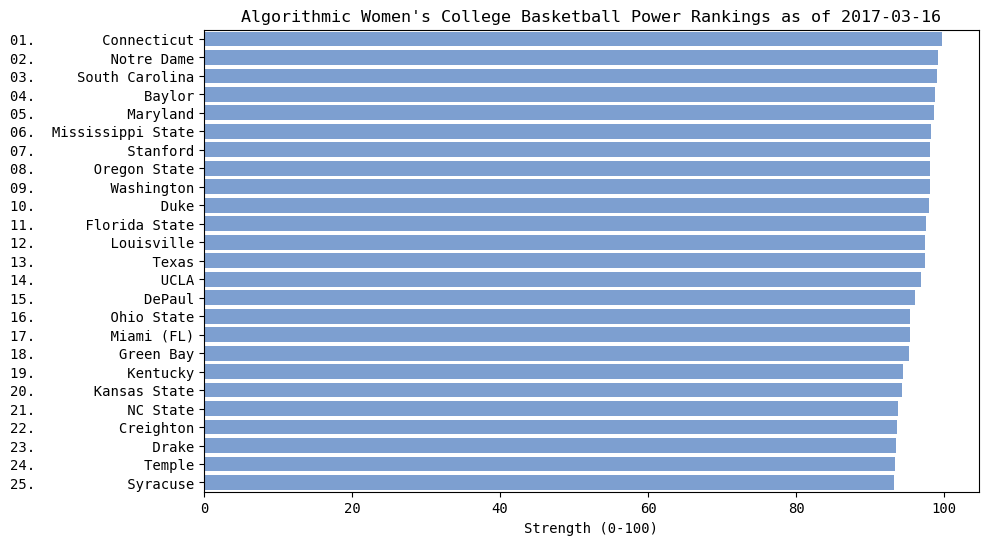

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['font.family'] = 'monospace'  # so spacing is consistent for y axis

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=df_ratings_display.head(25)['Strength'],
    y=(
        df_ratings_display.head(25).index.map(lambda x: str(x).zfill(2)) +  # team index with a leading 0 as needed
        '..' + ' '*2 +
        df_ratings_display.head(25)['Team'].str.pad(max(df_ratings_display.head(25)['Team'].str.len()), side='left')  # team name with padding
    ),
    color='#6f9cde',
    dodge=False
)

plt.xlabel('Strength (0-100)')
plt.ylabel(None)
plt.title(f"Algorithmic Women's College Basketball Power Rankings as of {df['Date'].max().strftime('%Y-%m-%d')}")

plt.show()

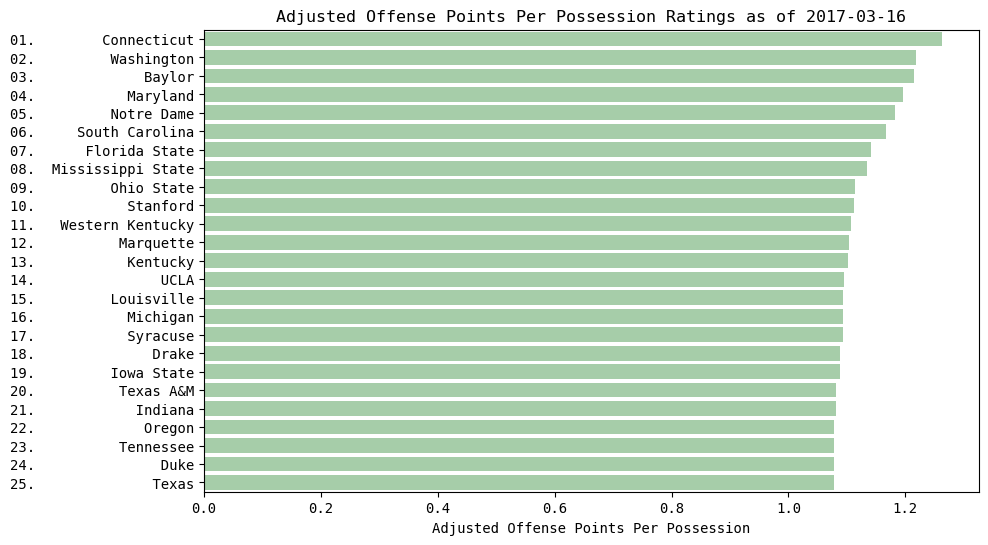

In [37]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=df_ppp_offense.head(25)['Rating'],
    y=(
        df_ppp_offense.head(25).index.map(lambda x: str(x+1).zfill(2)) +  # team index with a leading 0 as needed
        '..' + ' '*2 +
        df_ppp_offense.head(25)['Team'].str.pad(max(df_ppp_offense.head(25)['Team'].str.len()), side='left')  # team name with padding
    ),
    color='#9fd4a3',
    dodge=False
)

plt.xlabel('Adjusted Offense Points Per Possession')
plt.ylabel(None)
plt.title(f"Adjusted Offense Points Per Possession Ratings as of {df['Date'].max().strftime('%Y-%m-%d')}")

plt.show()

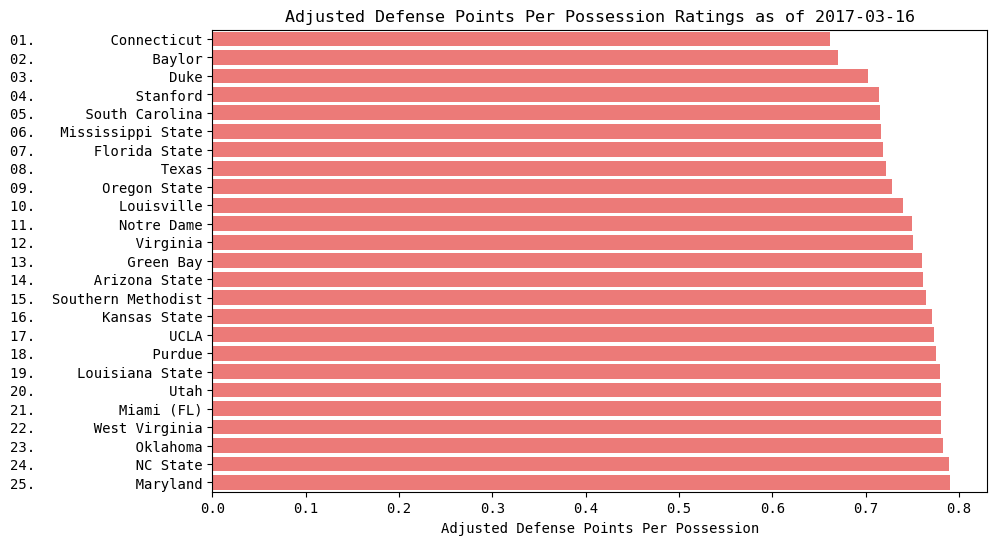

In [38]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=df_ppp_defense.head(25)['Rating'],
    y=(
        df_ppp_defense.head(25).index.map(lambda x: str(x+1).zfill(2)) +  # team index with a leading 0 as needed
        '..' + ' '*2 +
        df_ppp_defense.head(25)['Team'].str.pad(max(df_ppp_defense.head(25)['Team'].str.len()), side='left')  # team name with padding
    ),
    color='#ff6865',
    dodge=False
)

plt.xlabel('Adjusted Defense Points Per Possession')
plt.ylabel(None)
plt.title(f"Adjusted Defense Points Per Possession Ratings as of {df['Date'].max().strftime('%Y-%m-%d')}")

plt.show()

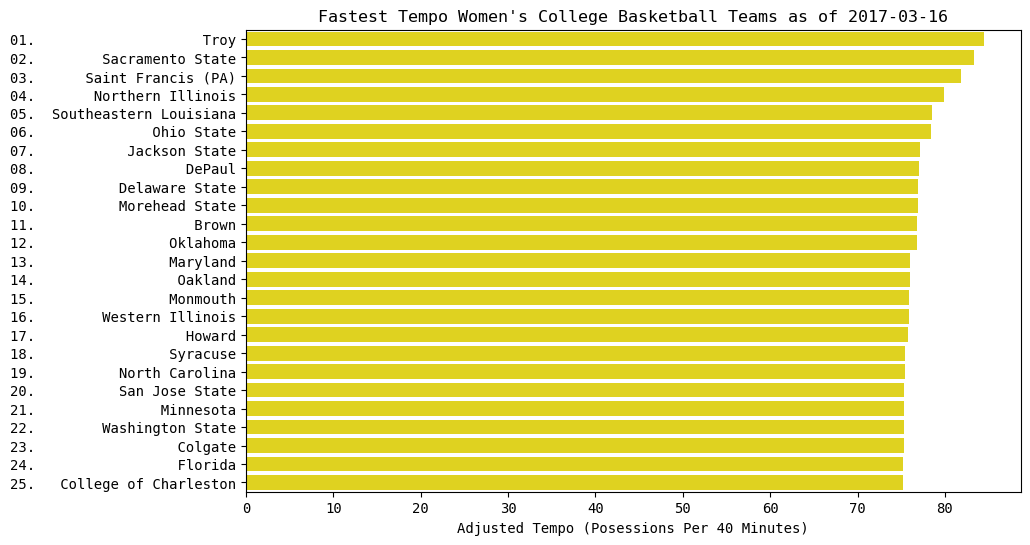

In [39]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=df_tempo.head(25)['Adjusted Tempo'],
    y=(
        df_tempo.head(25).index.map(lambda x: str(x+1).zfill(2)) +  # team index with a leading 0 as needed
        '..' + ' '*2 +
        df_tempo.head(25)['Team'].str.pad(max(df_tempo.head(25)['Team'].str.len()), side='left')  # team name with padding
    ),
    color='#ffee00',
    dodge=False
)

plt.xlabel('Adjusted Tempo (Posessions Per 40 Minutes)')
plt.ylabel(None)
plt.title(f"Fastest Tempo Women's College Basketball Teams as of {df['Date'].max().strftime('%Y-%m-%d')}")

plt.show()

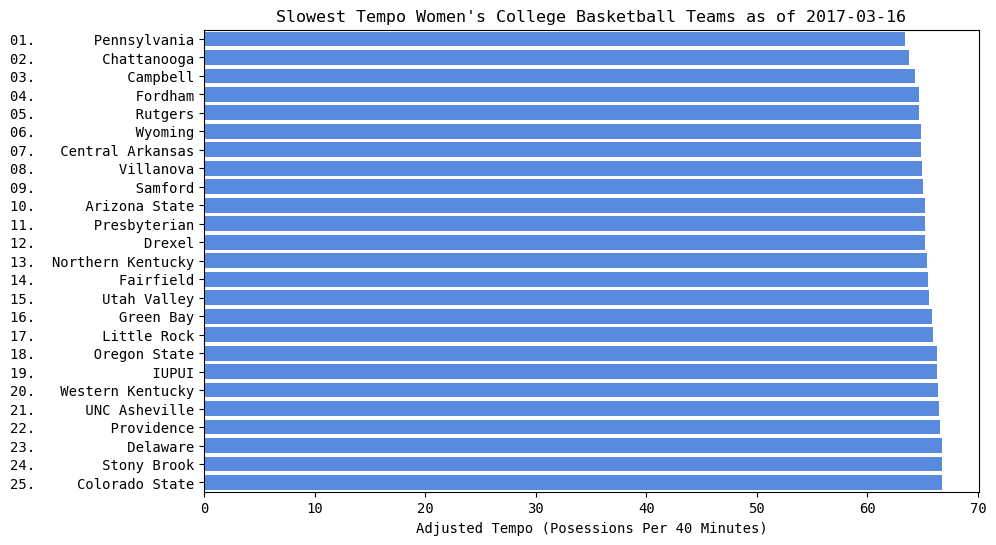

In [40]:
plt.figure(figsize=(10, 6))

df_slow = df_tempo.tail(25).iloc[::-1].reset_index(drop=True)

ax = sns.barplot(
    x=df_slow['Adjusted Tempo'],
    y=(
        df_slow.index.map(lambda x: str(x+1).zfill(2)) +  # team index with a leading 0 as needed
        '..' + ' '*2 +
        df_slow['Team'].str.pad(max(df_slow['Team'].str.len()), side='left')  # team name with padding
    ),
    color='#4285f4',
    dodge=False
)

plt.xlabel('Adjusted Tempo (Posessions Per 40 Minutes)')
plt.ylabel(None)
plt.title(f"Slowest Tempo Women's College Basketball Teams as of {df['Date'].max().strftime('%Y-%m-%d')}")

plt.show()

In [41]:
import plotly.express as px

fig = px.scatter(
    df_ppp_all,
    x='Adjusted Offense',
    y='Adjusted Defense',
    hover_data='Team',
    title=f'Adjusted Points Per Possession Ratings as of {df["Date"].max().strftime("%Y-%m-%d")}',
    width=1_000, height=600,
)

fig.update_layout(
    font_family='monospace',
    hovermode='closest',
    yaxis=dict(
        showgrid=False,
        ticks='outside',
    ),
    xaxis=dict(
        showgrid=False,
        ticks='outside',
    ),
    xaxis_range=(df_ppp_all['Adjusted Offense'].min()-0.01, df_ppp_all['Adjusted Offense'].max()+0.01),
    yaxis_range=(df_ppp_all['Adjusted Defense'].max()+0.01, df_ppp_all['Adjusted Defense'].min()-0.01),
)

fig.update_traces(marker=dict(size=12))

fig.add_vline(
    x=df_ppp_all['Adjusted Offense'].mean(),
    line=dict(color="red", width=2, dash="dot")
)

fig.add_hline(
    y=df_ppp_all['Adjusted Defense'].mean(),
    line=dict(color="red", width=2, dash="dot")
)

# sloped gridlines
minimum = min(df_ppp_all['Adjusted Offense'].min(), df_ppp_all['Adjusted Defense'].min())-0.01
maximum = max(df_ppp_all['Adjusted Offense'].max(), df_ppp_all['Adjusted Defense'].max())+0.01

for offset in np.linspace(0, maximum-minimum, 6):
    fig.add_scatter(
        x=(minimum+offset, maximum+offset),
        y=(minimum, maximum),
        mode='lines',
        line_color='grey',
        opacity=0.25,
        showlegend=False,
        hoverinfo='skip'
    )

    if offset:
        fig.add_scatter(
            x=(minimum-offset, maximum-offset),
            y=(minimum, maximum),
            mode='lines',
            line_color='grey',
            opacity=0.25,
            showlegend=False,
            hoverinfo='skip'
        )

fig.show()

### Miscellaneous

##### Save Rankings

In [42]:
df_sheet = pd.merge(
    df_ratings_display, df_ppp_all,
    how='left',
    on=['Team']
)

df_sheet = pd.merge(
    df_sheet, df_tempo,
    how='left',
    on=['Team']
)

df_sheet.insert(
    df_sheet.columns.get_loc('Adjusted Offense'),
    'Efficiency Margin',
    df_sheet['Adjusted Offense'] - df_sheet['Adjusted Defense']
)

df_sheet

,Team,Rating,Strength,Efficiency Margin,Adjusted Offense,Adjusted Defense,Adjusted Tempo
0,Connecticut,5.808826,99.700803,0.601094,1.262862,0.661768,71.783507
1,Notre Dame,4.731973,99.126785,0.431694,1.181508,0.749814,71.540208
2,South Carolina,4.587922,98.992849,0.450834,1.166428,0.715594,70.595569
3,Baylor,4.402229,98.789824,0.544489,1.214459,0.669970,73.980475
4,Maryland,4.275148,98.628084,0.404416,1.195389,0.790973,75.991418
...,...,...,...,...,...,...,...
344,Longwood,-3.819917,2.145904,-0.379159,0.717804,1.096963,73.518883
345,Delaware State,-3.961397,1.868089,-0.313422,0.724195,1.037617,76.950182
346,Chicago State,-4.313697,1.320721,-0.274144,0.760803,1.034947,68.891598
347,Alabama A&M,-4.460834,1.142078,-0.399502,0.643515,1.043018,69.335476


In [43]:
df_sheet.to_csv(f'../data/preprocessed/womens_my_rankings/womens_my_rankings_{season}.csv', index=False)

'Done'

'Done'